In [291]:
import pandas as pd
import numpy as np
import json
import os
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [292]:
df = pd.DataFrame()

In [293]:
file_path = r'C:\Users\liban\OneDrive - University of Waterloo\Projects\Football-Modelling\data\source\WhoScored\events\ENG-Premier League_2021'

for filename in os.listdir(file_path):
    f = os.path.join(file_path, filename)
    with open(f, 'r') as j:
        contents = json.loads(j.read())
        df = df.append(pd.DataFrame(contents["events"]))

In [294]:
df.shape

(324616, 33)

In [295]:
df.head()

,eventId,expandedMinute,id,isTouch,minute,outcomeType,period,qualifiers,satisfiedEventsTypes,second,...,blockedY,cardType,isGoal,$idx,$len,field,minuteInfo,satisfiers,text,isOwnGoal
0,2,0,2253487473,False,0,"{'displayName': 'Successful', 'value': 1}","{'displayName': 'FirstHalf', 'value': 1}",[],[],0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1000003,0,2253487469,False,0,"{'displayName': 'Successful', 'value': 1}","{'displayName': 'FirstHalf', 'value': 1}",[],[],0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1000004,0,2253487625,True,0,"{'displayName': 'Successful', 'value': 1}","{'displayName': 'FirstHalf', 'value': 1}","[{'type': {'displayName': 'Angle', 'value': 21...","[91, 117, 30, 35, 215, 218]",0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1000005,0,2253487639,True,0,"{'displayName': 'Successful', 'value': 1}","{'displayName': 'FirstHalf', 'value': 1}","[{'type': {'displayName': 'StandingSave', 'val...","[91, 117, 30, 36, 38, 216, 218]",2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1000006,0,2253487685,True,0,"{'displayName': 'Successful', 'value': 1}","{'displayName': 'FirstHalf', 'value': 1}","[{'type': {'displayName': 'Longball', 'value':...","[91, 119, 117, 123, 124, 127, 205, 39, 46, 36,...",7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [296]:
df.columns

Index(['eventId', 'expandedMinute', 'id', 'isTouch', 'minute', 'outcomeType',
       'period', 'qualifiers', 'satisfiedEventsTypes', 'second', 'teamId',
       'type', 'x', 'y', 'endX', 'endY', 'playerId', 'goalMouthY',
       'goalMouthZ', 'isShot', 'relatedEventId', 'relatedPlayerId', 'blockedX',
       'blockedY', 'cardType', 'isGoal', '$idx', '$len', 'field', 'minuteInfo',
       'satisfiers', 'text', 'isOwnGoal'],
      dtype='object')

In [297]:
df_shots = df[df["isShot"] == True].copy()

In [298]:
df_shots.head()

,eventId,expandedMinute,id,isTouch,minute,outcomeType,period,qualifiers,satisfiedEventsTypes,second,...,blockedY,cardType,isGoal,$idx,$len,field,minuteInfo,satisfiers,text,isOwnGoal
5,1000007,0,2253487689,True,0,"{'displayName': 'Successful', 'value': 1}","{'displayName': 'FirstHalf', 'value': 1}","[{'type': {'displayName': 'RelatedEventId', 'v...","[91, 7, 90, 10, 1, 3, 13]",11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53,1000029,2,2253489297,True,2,"{'displayName': 'Successful', 'value': 1}","{'displayName': 'FirstHalf', 'value': 1}","[{'type': {'displayName': 'GoalMouthY', 'value...","[91, 10, 2, 3, 11, 13]",49.0,...,37.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
178,1000093,9,2253492889,True,9,"{'displayName': 'Successful', 'value': 1}","{'displayName': 'FirstHalf', 'value': 1}","[{'type': {'displayName': 'GoalMouthZ', 'value...","[91, 10, 2, 3, 11, 12]",2.0,...,58.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
232,1000120,12,2253494513,True,12,"{'displayName': 'Successful', 'value': 1}","{'displayName': 'FirstHalf', 'value': 1}","[{'type': {'displayName': 'OutOfBoxCentre', 'v...","[91, 7, 10, 2, 3, 13]",5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
285,177,16,2253496507,True,16,"{'displayName': 'Successful', 'value': 1}","{'displayName': 'FirstHalf', 'value': 1}","[{'type': {'displayName': 'GoalMouthY', 'value...","[91, 9, 10, 1, 3, 12]",8.0,...,49.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [299]:
relevant_columns = ['outcome', 'x', 'y', 'intentional_assist', 'context', 'distance_to_goal',
                    'angle']

In [300]:
def angle(x,y):
    '''
    Calculated in Radians.
    '''
    #x = x*105/100
    #y = y*65/100
    
    x = 100 - x
    y = abs(y-50)
    x = x*105/100
    y = y*65/100
    a = np.arctan(7.32 *x /(x**2 + y**2 - (7.32/2)**2))
    if a < 0:
        a = np.pi + a
    return a

def intentional_assist(row):
    for x in row["qualifiers"]:
        if x["type"]["displayName"] == 'IntentionalAssist':
            return 1
    return 0

def context(row):
    for x in row["qualifiers"]:
        if x["type"]["displayName"] == 'RegularPlay':
             return 0
        if x["type"]["displayName"] == 'FromCorner':
            return 1
    return 2

def distance(x,y):
    x = 100 - x
    y = abs(y-50)
    x = x*105/100
    y = y*65/100
    return np.sqrt(x**2 + y**2)

def goal(row):
    if row["isGoal"] == True:
        return 1
    else:
        return 0

In [301]:
df_shots = df[df["isShot"] == True].copy()

df_shots['angle'] = df_shots.apply(lambda i: angle(i["x"], i["y"]), axis=1)
df_shots['intentional_assist'] = df_shots.apply(lambda i: intentional_assist(i), axis=1)
df_shots['context'] = df_shots.apply(lambda i: context(i), axis=1)
df_shots['distance_to_goal'] = df_shots.apply(lambda i: distance(i["x"], i["y"]), axis=1)
df_shots['isGoal'] = df_shots.apply(lambda i: goal(i), axis=1)

In [302]:
df_shots = df_shots[["isGoal", "x", "y", "angle", "intentional_assist", "distance_to_goal",
                    "context"]]

In [303]:
y = df_shots[["isGoal"]].copy()
X = df_shots.drop(["isGoal"], axis=1)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [304]:
logisticRegr = LogisticRegression()

logisticRegr.fit(x_train, y_train.values.ravel())
y_pred = logisticRegr.predict(x_test)
y_proba = logisticRegr.predict_proba(x_test)

In [305]:
train_acc = logisticRegr.score(x_train, y_train)
print("The Accuracy for Training Set is {}".format(train_acc*100))

The Accuracy for Training Set is 88.9187013683928


In [306]:
test_acc = accuracy_score(y_test, y_pred)
print("The Accuracy for Test Set is {}".format(test_acc*100))

The Accuracy for Test Set is 88.65647626709574


Text(0.5, 33.0, 'Predicted Values')

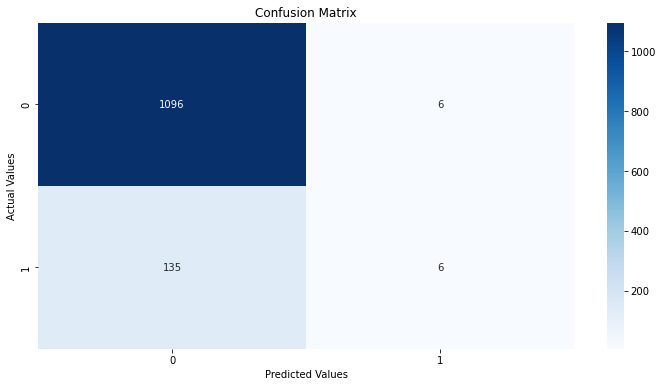

In [307]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")

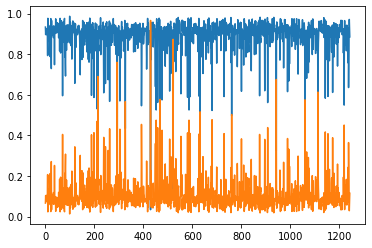

In [339]:
plt.plot(y_proba)

Text(0.5, 33.0, 'Predicted Values')

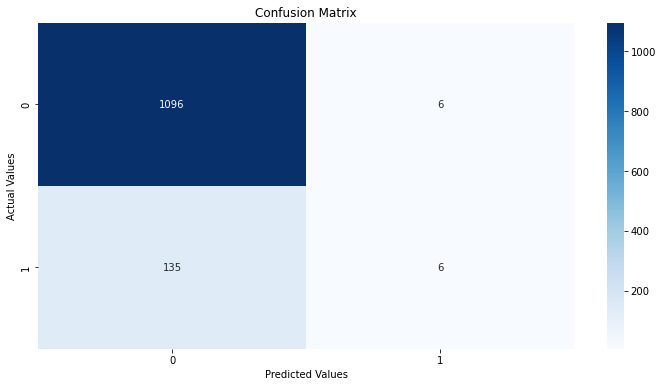

In [341]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")